Task 1
Implement serial test and apply to a `samples`

In [ ]:
import numpy as np
import random
import scipy.stats as stats

def serial_test(samples,bins=10):
    n = len(samples) // 2
    points = np.array(samples[:n * 2]).reshape(n, 2)
    hist, b = np.histogramdd(points, bins=[bins] * 2, range=[(0, 1)] * 2)
    expected_freq = n / (bins ** 2)
    chi2_stat = np.sum((expected_freq - hist) ** 2 / expected_freq)
    p_value = stats.kstest(samples, stats.uniform.cdf)[1]

    return chi2_stat, p_value
samples = [random.random() for _ in range(1000)]
chi2_stat, p_value = serial_test(samples, bins=10)

print(f"Статистика хи-квадрат: {chi2_stat:.2f}")
print(f"P-значение: {p_value:.4f}")
if p_value < 0.05:
    print("Последовательность не является равномерно случайной.")
else:
    print("Значительных отклонений от случайности не обнаружено.")

Статистика хи-квадрат: 104.00
P-значение: 0.7955
Значительных отклонений от случайности не обнаружено.


Task 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

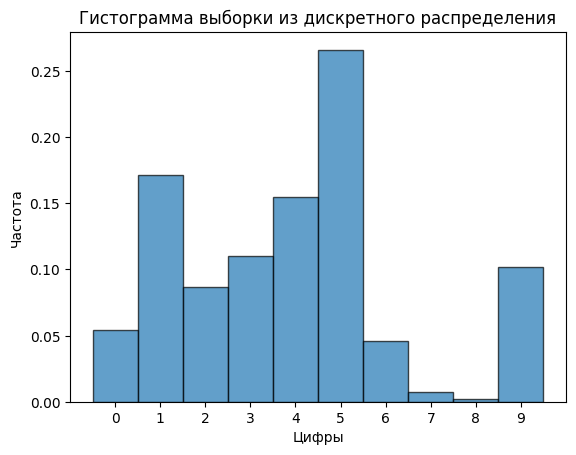

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем цифры и их соответствующие веса
digits = np.arange(10)  # Цифры от 0 до 9
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

# Нормализуем веса, чтобы их сумма была 1
weights /= weights.sum()

# Генерируем выборку из 1000 значений
samples = np.random.choice(digits, size=1000, p=weights)

# Строим гистограмму
plt.hist(samples, bins=np.arange(11) - 0.5, density=True, edgecolor='black', alpha=0.7)

# Подписываем оси
plt.xlabel("Цифры")
plt.ylabel("Частота")
plt.title("Гистограмма выборки из дискретного распределения")

# Показываем график
plt.xticks(digits)
plt.show()

Task 5


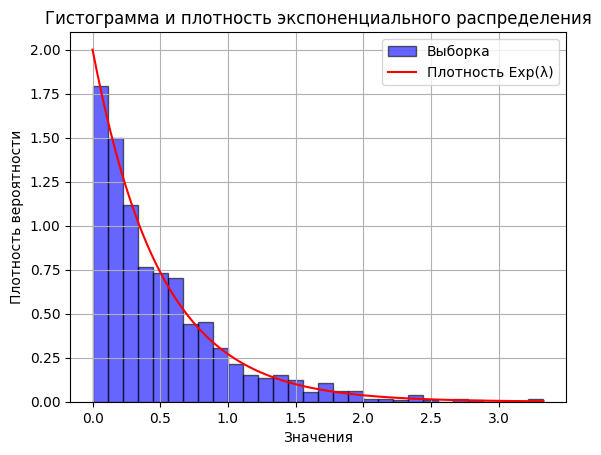

In [65]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param = 2.0
U = [random.random() for _ in range(1000)]
samples = -np.log(U) / lambda_param 

plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label="Выборка")

x = np.linspace(0, max(samples), 100)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, color= 'red', label="Плотность Exp(λ)")

plt.xlabel("Значения")
plt.ylabel("Плотность вероятности")
plt.title("Гистограмма и плотность экспоненциального распределения")
plt.legend()
plt.grid(True)
plt.show()

Task 6


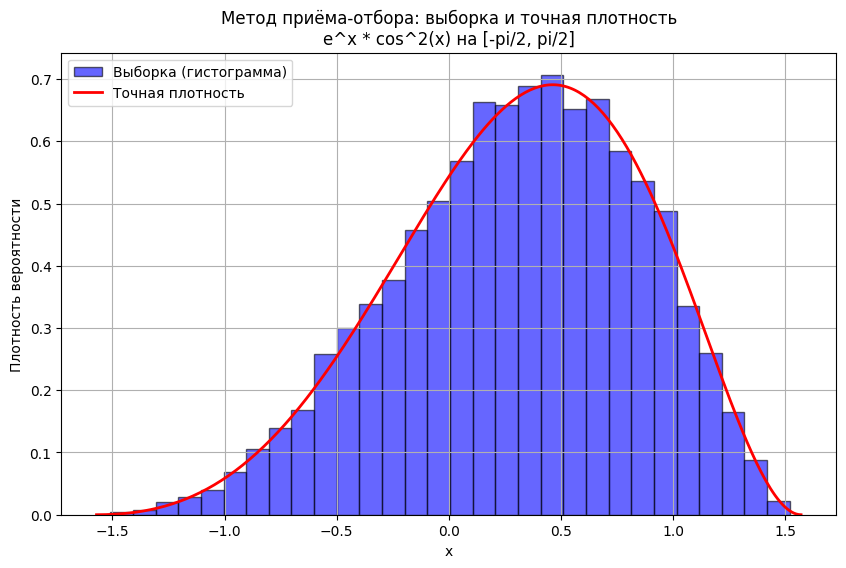

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
def f(x):
    return np.exp(x) * np.cos(x)**2

def sample_accept_reject(N):
    samples = []
    g_val = 1.0 / np.pi
    
    while len(samples) < N:
        x_candidate = np.random.uniform(-np.pi/2, np.pi/2)
        u = np.random.uniform(0, 1)
        if u < f(x_candidate) * np.pi:
            samples.append(x_candidate)        
    return np.array(samples)

Z, _ = quad(f, -np.pi/2, np.pi/2)
N = 100000
sampled_points = sample_accept_reject(N)

x_values = np.linspace(-np.pi/2, np.pi/2, 300)
density_values = f(x_values) / Z

plt.figure(figsize=(10, 6))
plt.hist(sampled_points, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Выборка (гистограмма)')
plt.plot(x_values, density_values, color = 'red', linewidth=2, label='Точная плотность')

plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.title('Метод приёма-отбора: выборка и точная плотность\ne^x * cos^2(x) на [-pi/2, pi/2]')
plt.legend()
plt.grid(True)
plt.show()

Task 7

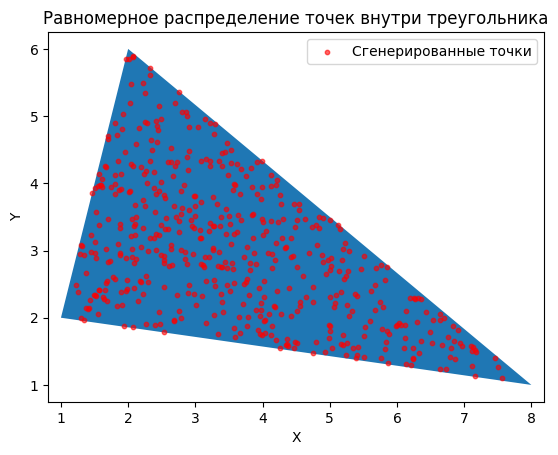

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
vertices = np.array([[1, 2], [2, 6], [8, 1]])

def sample_points_in_triangle(vertices):
    points = np.zeros((500, 2))
    for i in range(500):
        u, v = np.random.random(), np.random.random()
        if u + v > 1:
            u, v = 1 - u, 1 - v
        point = (1 - u - v) * vertices[0] + u * vertices[1] + v * vertices[2]
        points[i] = point 
    return points
points = sample_points_in_triangle(vertices)
fig = plt.figure()
polygon = Polygon(xy=vertices, closed=True, edgecolor='black', facecolor='none', fill=False, linewidth=2)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(points[:, 0], points[:, 1], color='red', s=10, alpha=0.6, label='Сгенерированные точки')
plt.title('Равномерное распределение точек внутри треугольника')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

Task 8

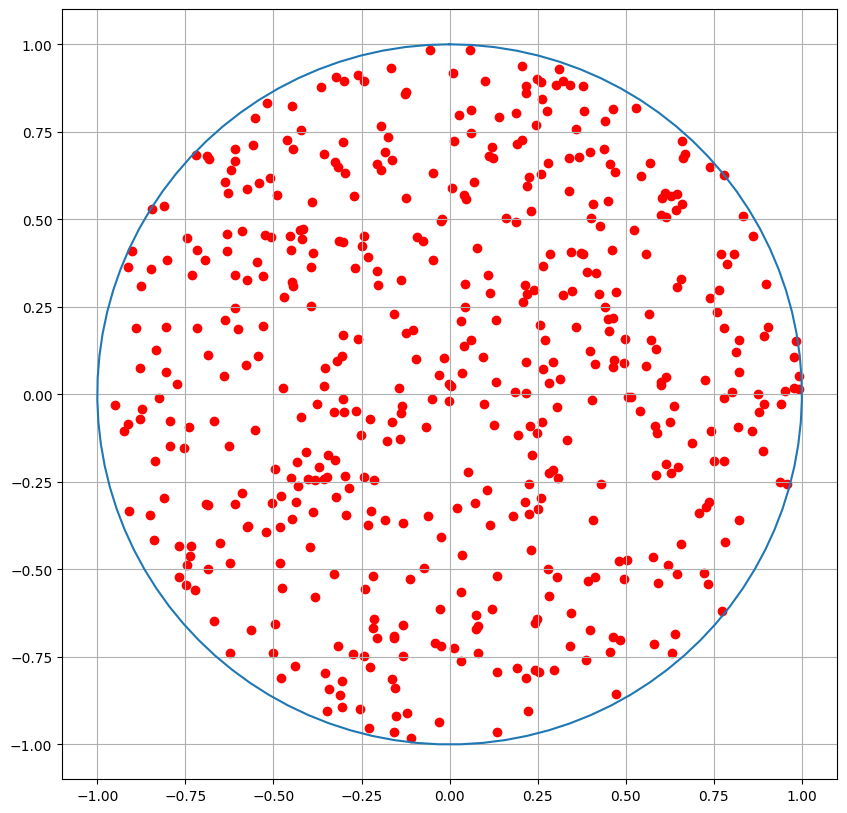

In [151]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points_in_circle(n_points):
  theta = np.random.uniform(0, 2 * np.pi, n_points)
  u = np.random.uniform(0, 1, n_points)
  r = np.sqrt(u)
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  points = np.column_stack((x, y))
  return points
n_points = 500
points = generate_points_in_circle(n_points)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], color='red')
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.grid(True)
plt.show()